Anzahl der Streichhölzer: 9
B_n: zufällige Anzahl der noch in der anderen Schachtel befindlichen Streichhölzer
Anzahl an Simulationen: 10000


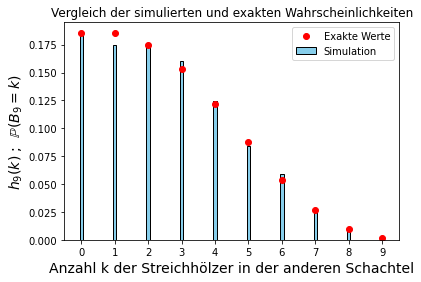

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def simulate(n, num_simulations):
    counts = np.zeros(n + 1, dtype=int)
    
    for _ in range(num_simulations):
        pockets = [n, n]
        
        while True:
            chosen_pocket = np.random.choice(2)
            if pockets[chosen_pocket] == 0:
                other_pocket = 1 - chosen_pocket
                counts[pockets[other_pocket]] += 1
                break
            
            pockets[chosen_pocket] -= 1
    
    probabilities = counts / num_simulations
    return probabilities

def exact_probabilities(n):
    probs = np.zeros(n + 1)
    for k in range(n + 1):
        binomial_coefficient = comb(2 * n - k, n, exact=True)
        probs[k] = binomial_coefficient * (0.5 ** (2 * n - k))
    return probs

def plot_bar_chart(sim_probabilities, exact_probabilities, n):
    x = np.arange(n + 1)
    
    bar_width = 0.1
    
    fig, ax = plt.subplots()
    bars = ax.bar(x, sim_probabilities, color='skyblue',
                  edgecolor='black', width=bar_width, label='Simulation')
    
    # Plotten der exakten Wahrscheinlichkeiten als Punkte
    ax.plot(x, exact_probabilities, 'ro', label='Exakte Werte')  # 'ro' für rote Punkte

    ax.set_xlabel('Anzahl k der Streichhölzer in der anderen Schachtel',fontsize=14)
    ax.set_ylabel(r'$h_{{{0}}}(k)$ ;  $\mathbb{{P}}(B_{{{0}}} = k)$'.format(n),fontsize=14)
    
    ax.set_title('Vergleich der simulierten und exakten Wahrscheinlichkeiten')
    ax.legend()
    
    plt.xticks(x)
    plt.show()

# Setze die Parameter
n = 9  # Anzahl der Streichhölzer in jeder Schachtel
num_simulations = 10000  # Anzahl der Simulationen

# Führe die Simulation durch
sim_probabilities = simulate(n, num_simulations)

# Berechne die exakten Wahrscheinlichkeiten
exact_probabilities = exact_probabilities(n)

print('Anzahl der Streichhölzer:',n)
print('B_n: zufällige Anzahl der noch in der anderen Schachtel befindlichen Streichhölzer')
print('Anzahl an Simulationen:',num_simulations)
# Plotten des Stabdiagramms und der exakten Wahrscheinlichkeiten
plot_bar_chart(sim_probabilities, exact_probabilities, n)